# ***German state elections EDA***

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eyeofra","key":"0b402b355662894b88478a27743723e0"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
%cd ..

/


In [ ]:
!pwd

/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download lennarthaupts/state-elections-in-germany-surveysresults

  0% 0.00/20.7k [00:00<?, ?B/s]
100% 20.7k/20.7k [00:00<00:00, 22.1MB/s]


In [ ]:
!unzip state-elections-in-germany-surveysresults.zip

Archive:  state-elections-in-germany-surveysresults.zip
  inflating: election_results_german_federal_states.csv  
  inflating: federal_elections_germany_survey.csv  
  inflating: train_df.csv            


## ***General information***
### data comprises of 3 dataframes
* train_df.csv
* election_result_german_federal_states_df
* election_results_german_federal_states_df

## Description of the survey data(*from kaggle*)

institute: institute conducting the survey
client: organization which commissioned the survey date

CDU, SPD, GRÜNE, FDP, LINKE , AfD, CSU, FW, PIRATEN, NPD, SSW: Political Parties
Sonstige: Other Parties

state: Federal Sate

method: T (telephone), O (online), TOM(mixed), F (face to face)
timeframe of the survey
Description of the election results
Only contains results for parties which regularly make it to parliaments

Date: Date of the election
CDU, SPD, Die Gruenen, CSU, FDP, Die Linke , AfD, FW
bl: Federal State
Description of train_df
A small data-set ready for the use of ml-methods (work in progress)

results: result of the specific party

party: political party

date: date of the election

state: federal state

year: year of the election

dimap-pred, Forsa-pred, INSA-pred, FGW-pred, 

GMS-pred: last survey results before the election by one of the most frequent institutes
dimap-method, Forsa-method, INSA-method, FGW-method, GMS-method: method of last survey
dimap-dist, Forsa-dist INSA-dist, FGW-dist, 

GMS-dist: days between survey and election

sum_isna: number of missing survey results

Notes regarding regional peculiarities
CDU and CSU are so called "sister-parties" the CSU is only up for election in Bavaria. SSW is a party representing the Danish and Frisian minorities in Schleswig-Holstein.

In [ ]:
# display tables

from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

train_df=pd.read_csv("train_df.csv")
election_results_german_federal_states_df=pd.read_csv("election_results_german_federal_states.csv")
federal_elections_germany_survey_df=pd.read_csv("federal_elections_germany_survey.csv")

In [ ]:
train_df.head()

,result,party,date,turnout,state,Year,dimap_pred,dimap_method,dimap_dist,Forsa_pred,...,INSA_pred,INSA_method,INSA_dist,FGW_pred,FGW_method,FGW_dist,GMS_pred,GMS_method,GMS_dist,sum_isna
0,16.0,SPD,2022-05-08,60.4,schleswig-holstein,2022,19.0,TOM,10 days,NaN,...,NaN,NaN,NaN,18.0,T,3 days,NaN,NaN,NaN,3
1,6.4,FDP,2022-05-08,60.4,schleswig-holstein,2022,9.0,TOM,10 days,NaN,...,NaN,NaN,NaN,8.0,T,3 days,NaN,NaN,NaN,3
2,43.4,CDU,2022-05-08,60.4,schleswig-holstein,2022,38.0,TOM,10 days,NaN,...,NaN,NaN,NaN,38.0,T,3 days,NaN,NaN,NaN,3
3,18.3,GRÜNE,2022-05-08,60.4,schleswig-holstein,2022,16.0,TOM,10 days,NaN,...,NaN,NaN,NaN,18.0,T,3 days,NaN,NaN,NaN,3
4,4.4,AfD,2022-05-08,60.4,schleswig-holstein,2022,5.0,TOM,10 days,NaN,...,NaN,NaN,NaN,6.0,T,3 days,NaN,NaN,NaN,3


In [ ]:
election_results_german_federal_states_df.head()

,Date,CDU,SPD,Die Gruenen,CSU,FDP,Die Linke,AfD,FW,bl,turnout,Year
0,2022-05-08,43.4,16.0,18.30,NaN,6.4,1.7,4.4,NaN,schleswig-holstein,60.4,2022
1,2022-03-27,28.5,43.5,4.99,NaN,4.8,2.6,5.7,NaN,saarland,61.4,2022
2,2021-09-26,18.0,21.4,18.90,NaN,7.1,14.1,8.0,NaN,berlin,75.4,2021
3,2021-09-26,13.3,39.6,6.30,NaN,5.8,9.9,16.7,NaN,mecklenburg-vorpommern,70.8,2021
4,2021-06-06,37.1,8.4,5.90,NaN,6.4,11.0,20.8,NaN,sachsen-anhalt,60.3,2021


In [ ]:
federal_elections_germany_survey_df.head()

,institute,client,date,CDU,SPD,GRÜNE,FDP,LINKE,AfD,Sonstige,state,CSU,FW,PIRATEN,NPD,SSW,method,timeframe
0,Infratestdimap,SWR,21.04.2022,26.0,15.0,28.0,11.0,3.0,9.0,8.0,baden-wuerttemberg,NaN,NaN,NaN,NaN,NaN,TOM,1.17012.04.–19.04.
1,INSA,BILD,06.04.2022,23.0,19.0,25.0,11.0,3.0,10.0,9.0,baden-wuerttemberg,NaN,NaN,NaN,NaN,NaN,O,1.00028.03.–04.04.
2,Infratestdimap,"SWR,Stuttgarter Zeitung",10.03.2022,24.0,18.0,27.0,13.0,3.0,9.0,6.0,baden-wuerttemberg,NaN,NaN,NaN,NaN,NaN,TOM,1.15204.03.–08.03.
3,Infratestdimap,"SWR,Stuttgarter Zeitung",20.01.2022,23.0,16.0,26.0,12.0,4.0,11.0,8.0,baden-wuerttemberg,NaN,NaN,NaN,NaN,NaN,TOM,1.16613.01.–18.01.
4,INSA,BILD,12.10.2021,20.0,21.0,24.0,16.0,3.0,9.0,7.0,baden-wuerttemberg,NaN,NaN,NaN,NaN,NaN,O,1.00004.10.–11.10.


## ***Descriptive statistics***

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   result        128 non-null    float64
 1   party         128 non-null    object 
 2   date          128 non-null    object 
 3   turnout       128 non-null    float64
 4   state         128 non-null    object 
 5   Year          128 non-null    int64  
 6   dimap_pred    116 non-null    float64
 7   dimap_method  116 non-null    object 
 8   dimap_dist    116 non-null    object 
 9   Forsa_pred    37 non-null     float64
 10  Forsa_method  37 non-null     object 
 11  Forsa_dist    37 non-null     object 
 12  INSA_pred     105 non-null    float64
 13  INSA_method   105 non-null    object 
 14  INSA_dist     105 non-null    object 
 15  FGW_pred      77 non-null     float64
 16  FGW_method    79 non-null     object 
 17  FGW_dist      79 non-null     object 
 18  GMS_pred      7 non-null      

In [ ]:
train_df.describe()

,result,turnout,Year,dimap_pred,Forsa_pred,INSA_pred,FGW_pred,GMS_pred,sum_isna
count,128.000000,128.000000,128.000000,116.000000,37.000000,105.000000,77.000000,7.000000,128.000000
mean,15.243672,63.825000,2018.468750,15.448276,15.189189,15.366667,15.655844,13.571429,2.328125
std,11.156214,5.246596,2.462115,10.758491,9.791827,10.946607,10.117162,10.829853,0.914532
min,2.100000,52.700000,2014.000000,3.000000,2.000000,2.000000,4.000000,4.000000,0.000000
25%,6.050000,61.100000,2016.000000,6.000000,7.000000,6.000000,7.000000,6.500000,2.000000
50%,11.350000,63.800000,2018.000000,12.000000,14.000000,11.000000,13.000000,12.000000,2.000000
75%,21.625000,66.600000,2021.000000,22.250000,21.000000,25.000000,22.000000,15.000000,3.000000
max,45.600000,75.400000,2022.000000,44.000000,38.000000,42.000000,41.000000,36.000000,4.000000


In [ ]:
election_results_german_federal_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         42 non-null     object 
 1   CDU          40 non-null     float64
 2   SPD          42 non-null     float64
 3   Die Gruenen  42 non-null     float64
 4   CSU          2 non-null      float64
 5   FDP          42 non-null     float64
 6   Die Linke    42 non-null     float64
 7   AfD          29 non-null     float64
 8   FW           4 non-null      float64
 9   bl           42 non-null     object 
 10  turnout      42 non-null     float64
 11  Year         42 non-null     int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 4.1+ KB


In [ ]:
election_results_german_federal_states_df.describe()

,CDU,SPD,Die Gruenen,CSU,FDP,Die Linke,AfD,FW,turnout,Year
count,40.000000,42.000000,42.000000,2.000000,42.000000,42.000000,29.000000,4.000000,42.000000,42.000000
mean,28.357500,26.847619,12.652143,42.450000,5.900000,8.947619,11.593103,7.350000,62.407143,2015.976190
std,8.152108,11.177312,7.115421,7.424621,2.566007,7.293941,7.002241,3.660146,5.842418,3.803003
min,11.200000,7.700000,4.000000,37.200000,1.200000,1.700000,4.100000,3.400000,49.200000,2010.000000
25%,22.275000,20.000000,6.325000,39.825000,4.125000,3.025000,6.100000,4.900000,59.750000,2012.250000
50%,29.150000,28.950000,11.250000,42.450000,5.850000,5.950000,9.700000,7.200000,62.400000,2016.000000
75%,34.750000,35.675000,17.550000,45.075000,7.325000,12.525000,15.100000,9.650000,65.125000,2019.000000
max,43.400000,48.400000,32.600000,47.700000,12.600000,31.000000,27.500000,11.600000,75.400000,2022.000000


In [ ]:
federal_elections_germany_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   institute  760 non-null    object 
 1   client     760 non-null    object 
 2   date       760 non-null    object 
 3   CDU        680 non-null    float64
 4   SPD        760 non-null    float64
 5   GRÜNE      760 non-null    float64
 6   FDP        693 non-null    float64
 7   LINKE      747 non-null    float64
 8   AfD        691 non-null    float64
 9   Sonstige   745 non-null    float64
 10  state      760 non-null    object 
 11  CSU        80 non-null     float64
 12  FW         110 non-null    float64
 13  PIRATEN    111 non-null    float64
 14  NPD        12 non-null     float64
 15  SSW        24 non-null     float64
 16  method     760 non-null    object 
 17  timeframe  760 non-null    object 
dtypes: float64(12), object(6)
memory usage: 107.0+ KB


In [ ]:
federal_elections_germany_survey_df.describe()

,CDU,SPD,GRÜNE,FDP,LINKE,AfD,Sonstige,CSU,FW,PIRATEN,NPD,SSW
count,680.000000,760.000000,760.000000,693.000000,747.000000,691.000000,745.000000,80.000000,110.000000,111.000000,12.000000,24.000000
mean,26.771471,23.151711,14.669079,6.167532,11.060107,11.130825,5.365369,42.006250,6.531818,4.864865,3.358333,3.708333
std,6.703610,9.497547,7.133761,2.404596,7.861517,5.926105,2.053657,5.080674,2.496123,3.488908,1.101617,0.858673
min,12.000000,6.000000,4.000000,1.000000,2.000000,2.000000,0.200000,32.000000,2.000000,1.000000,1.300000,3.000000
25%,22.000000,15.900000,9.000000,5.000000,4.000000,7.000000,4.000000,37.750000,5.000000,3.000000,3.000000,3.000000
50%,27.000000,23.000000,14.000000,6.000000,9.000000,10.000000,5.000000,42.500000,6.000000,4.000000,3.000000,3.500000
75%,32.000000,30.000000,19.000000,8.000000,16.000000,13.500000,7.000000,47.000000,8.000000,5.500000,4.000000,4.000000
max,43.000000,52.000000,38.000000,16.000000,40.000000,28.000000,13.000000,49.000000,13.000000,15.000000,5.000000,6.000000


## ***data cleanup***

In [ ]:
# dropping columns with too much null-values
# NOTE: there is change in data

train_df_mod=train_df.drop(['GMS_pred','GMS_method','GMS_dist'],axis=1)


In [ ]:
election_results_german_federal_states_df_mod=election_results_german_federal_states_df.drop(['CSU','FW'],axis=1)

In [ ]:
federal_elections_germany_survey_df_mod=federal_elections_germany_survey_df.drop(['NPD'],axis=1)

In [ ]:
# dropping columns with little variance in data

from sklearn.feature_selection import VarianceThreshold
var_thres_train=VarianceThreshold(threshold=0)
var_thres_election=VarianceThreshold(threshold=0)
var_thres_federal=VarianceThreshold(threshold=0)

var_thres_train.fit(train_df_mod[["result","turnout","dimap_pred","FGW_pred"]])

var_thres_election.fit(election_results_german_federal_states_df_mod[["CDU","SPD","Die Gruenen","FDP","Die Linke","AfD"]])

var_thres_federal.fit(federal_elections_germany_survey_df_mod[["CDU","SPD","GRÜNE","FDP","LINKE","AfD","Sonstige"]])

VarianceThreshold(threshold=0)

In [ ]:
var_thres_train.get_support()

array([ True,  True,  True,  True])

In [ ]:
train_df_mod[["result","turnout","dimap_pred","FGW_pred"]]

,result,turnout,dimap_pred,FGW_pred
0,16.0,60.4,19.0,18.0
1,6.4,60.4,9.0,8.0
2,43.4,60.4,38.0,38.0
3,18.3,60.4,16.0,18.0
4,4.4,60.4,5.0,6.0
...,...,...,...,...
123,12.4,52.7,NaN,NaN
124,2.5,52.7,NaN,NaN
125,33.5,52.7,NaN,NaN
126,5.7,52.7,NaN,NaN


In [ ]:
var_thres_election.get_support()

array([ True,  True,  True,  True,  True,  True])

In [ ]:
var_thres_federal.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
# No elimination of column values needed(because all column values are not constant)

In [ ]:
# fillna

train_df_mod.isna().sum()

result           0
party            0
date             0
turnout          0
state            0
Year             0
dimap_pred      12
dimap_method    12
dimap_dist      12
Forsa_pred      91
Forsa_method    91
Forsa_dist      91
INSA_pred       23
INSA_method     23
INSA_dist       23
FGW_pred        51
FGW_method      49
FGW_dist        49
sum_isna         0
dtype: int64

In [ ]:
train_df_mod['dimap_pred'].median()

12.0

In [ ]:
train_df_mod['Forsa_pred'].median()

14.0

In [ ]:
train_df_mod['INSA_pred'].median()

11.0

In [ ]:
train_df_mod['dimap_pred'].fillna(12,inplace=True)
train_df_mod['Forsa_pred'].fillna(14,inplace=True)
train_df_mod['INSA_pred'].fillna(11,inplace=True)

In [ ]:
train_df_mod.isna().sum()

result           0
party            0
date             0
turnout          0
state            0
Year             0
dimap_pred       0
dimap_method    12
dimap_dist      12
Forsa_pred       0
Forsa_method    91
Forsa_dist      91
INSA_pred        0
INSA_method     23
INSA_dist       23
FGW_pred        51
FGW_method      49
FGW_dist        49
sum_isna         0
dtype: int64

In [ ]:
# popularity of different parties

train_df_mod['date']=pd.to_datetime(train_df_mod["date"])

In [ ]:
train_df_mod["date"].dtype

dtype('<M8[ns]')

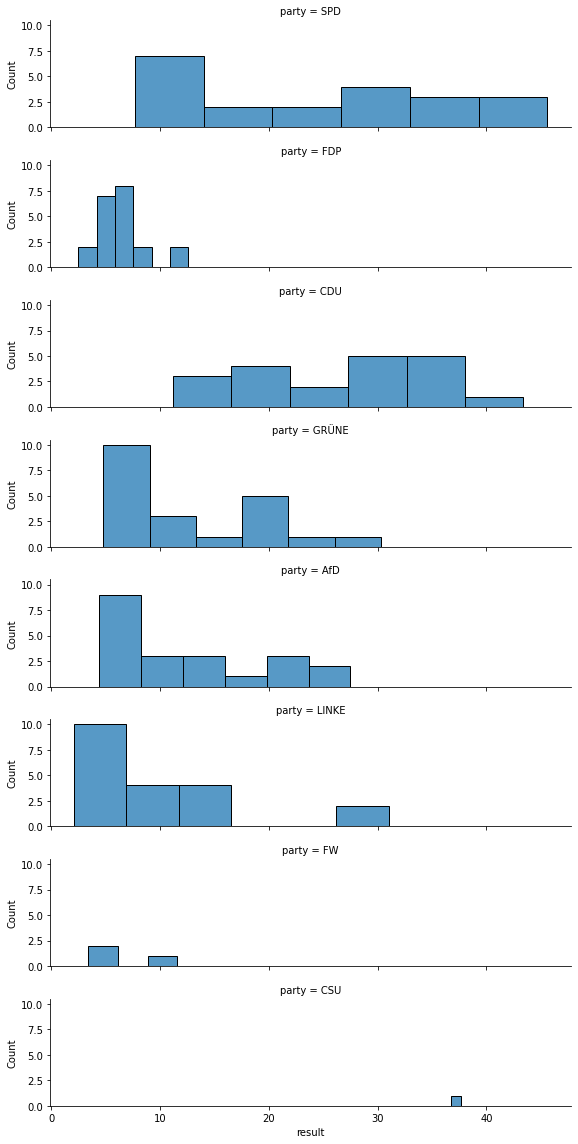

In [ ]:
import seaborn as sns
g=sns.FacetGrid(train_df_mod,row="party",height=2,aspect=4)
g.map(sns.histplot, "result")

In [ ]:
train_df_mod.head()

,result,party,date,turnout,state,Year,dimap_pred,dimap_method,dimap_dist,Forsa_pred,Forsa_method,Forsa_dist,INSA_pred,INSA_method,INSA_dist,FGW_pred,FGW_method,FGW_dist,sum_isna
0,16.0,SPD,2022-05-08,60.4,schleswig-holstein,2022,19.0,TOM,10 days,14.0,NaN,NaN,11.0,NaN,NaN,18.0,T,3 days,3
1,6.4,FDP,2022-05-08,60.4,schleswig-holstein,2022,9.0,TOM,10 days,14.0,NaN,NaN,11.0,NaN,NaN,8.0,T,3 days,3
2,43.4,CDU,2022-05-08,60.4,schleswig-holstein,2022,38.0,TOM,10 days,14.0,NaN,NaN,11.0,NaN,NaN,38.0,T,3 days,3
3,18.3,GRÜNE,2022-05-08,60.4,schleswig-holstein,2022,16.0,TOM,10 days,14.0,NaN,NaN,11.0,NaN,NaN,18.0,T,3 days,3
4,4.4,AfD,2022-05-08,60.4,schleswig-holstein,2022,5.0,TOM,10 days,14.0,NaN,NaN,11.0,NaN,NaN,6.0,T,3 days,3


In [ ]:
# time series of popular parties

train_df_mod_SPD=train_df_mod.loc[train_df_mod.party=='SPD',:]
train_df_mod_CDU=train_df_mod.loc[train_df_mod.party=='CDU',:]
train_df_mod_GRÜNE=train_df_mod.loc[train_df_mod.party=='GRÜNE',:]

import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='date', ylabel='result', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

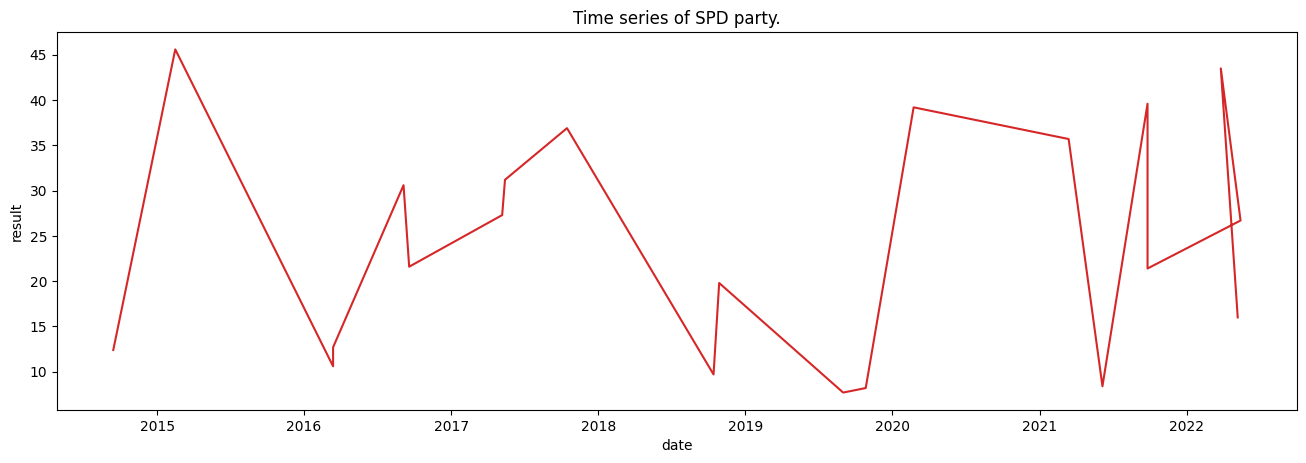

In [ ]:
plot_df(train_df_mod_SPD, x=train_df_mod_SPD.date, y=train_df_mod_SPD.result, title='Time series of SPD party.')    

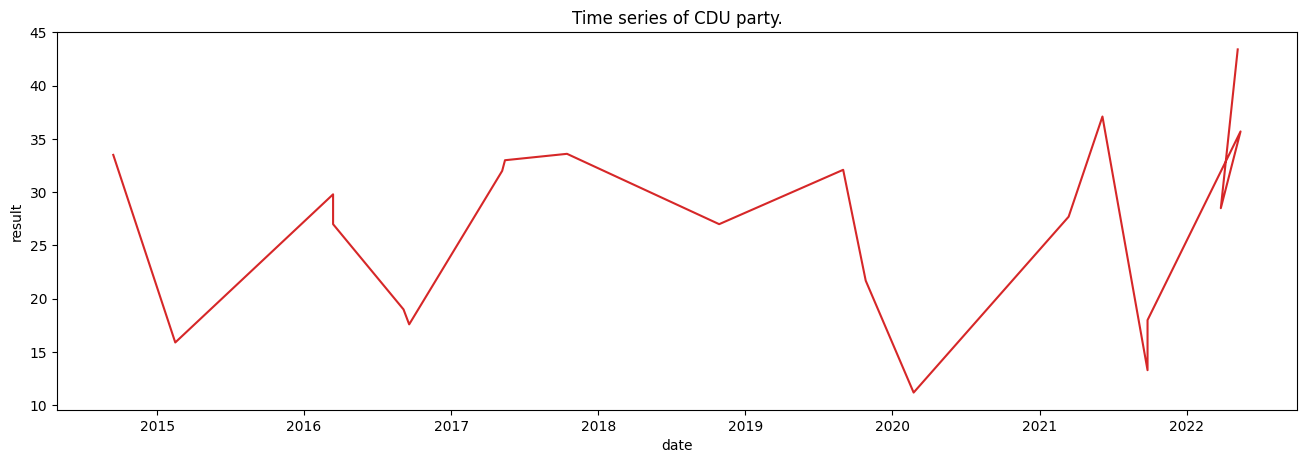

In [ ]:
plot_df(train_df_mod_CDU, x=train_df_mod_CDU.date, y=train_df_mod_CDU.result, title='Time series of CDU party.')    

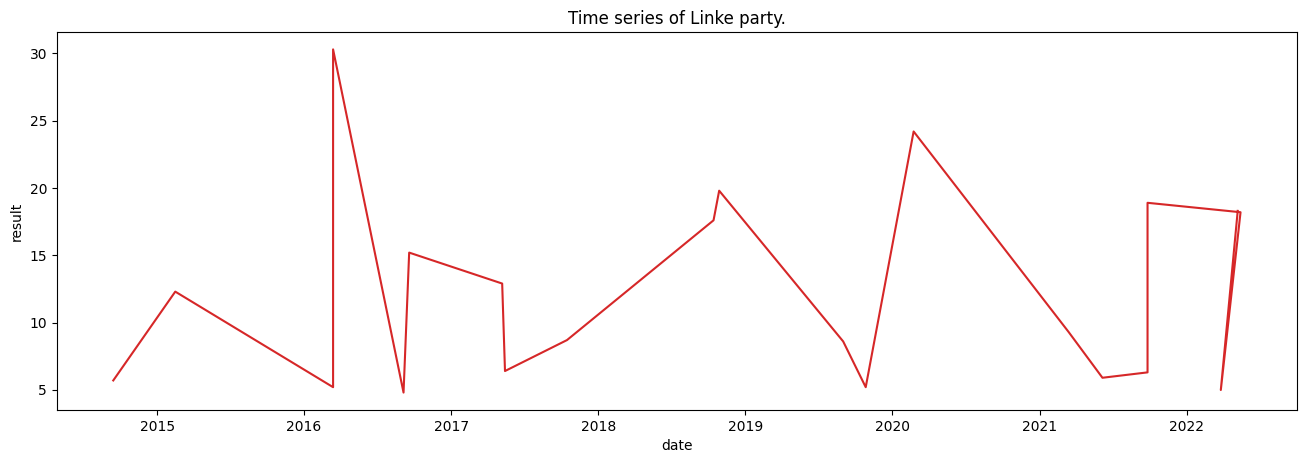

In [ ]:
plot_df(train_df_mod_GRÜNE, x=train_df_mod_GRÜNE.date, y=train_df_mod_GRÜNE.result, title='Time series of Linke party.')

## *Inference*:
* While the GRÜNE and SPD party had fallen out of popularity, after 2021, CDU party has gotten greater results(yet to be statistically proven)
* No underlying trend can be observed currently observed(because of volatile results of each party)
* SPD and CDU party has the higest turnout and result(by observing histplot)

## ***EDA on federal elections and surveys***

In [ ]:
election_results_german_federal_states_df_mod1=election_results_german_federal_states_df_mod[['CDU','SPD','Die Gruenen','Die Linke','AfD','Year']]

In [ ]:
federal_elections_germany_survey_df_mod1=federal_elections_germany_survey_df_mod[['date','CDU','SPD','GRÜNE','LINKE','AfD']]

In [ ]:
election_results_german_federal_states_df_mod1.head()

,CDU,SPD,Die Gruenen,Die Linke,AfD,Year
0,43.4,16.0,18.30,1.7,4.4,2022
1,28.5,43.5,4.99,2.6,5.7,2022
2,18.0,21.4,18.90,14.1,8.0,2021
3,13.3,39.6,6.30,9.9,16.7,2021
4,37.1,8.4,5.90,11.0,20.8,2021


In [ ]:
election_result_party=election_results_german_federal_states_df_mod1.groupby(['Year']).mean()

In [ ]:
election_result_party.head()

,CDU,SPD,Die Gruenen,Die Linke,AfD
Year,,,,,
2010,34.600000,34.500000,12.100000,5.600000,NaN
2011,27.900000,33.028571,15.242857,10.228571,NaN
2012,30.766667,33.366667,9.833333,6.966667,NaN
2013,37.150000,27.966667,11.133333,3.466667,4.10
2014,36.450000,12.400000,5.700000,23.550000,10.15


In [ ]:
# selection of 2022 results

result_2022=election_result_party.loc[[2022],:]

In [ ]:
result_2022

,CDU,SPD,Die Gruenen,Die Linke,AfD
Year,,,,,
2022,35.866667,28.733333,13.83,2.133333,5.166667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


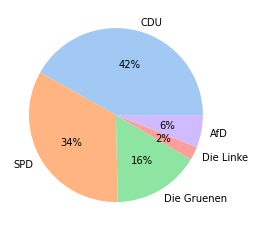

In [ ]:
# pie chart distribution

import matplotlib.pyplot as plt
import seaborn as sns

#define data
data=[result_2022["CDU"],result_2022["SPD"],result_2022["Die Gruenen"],result_2022["Die Linke"],result_2022["AfD"]]
labels = ["CDU","SPD","Die Gruenen","Die Linke","AfD"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
federal_elections_germany_survey_df_mod1.head()

,date,CDU,SPD,GRÜNE,LINKE,AfD
0,21.04.2022,26.0,15.0,28.0,3.0,9.0
1,06.04.2022,23.0,19.0,25.0,3.0,10.0
2,10.03.2022,24.0,18.0,27.0,3.0,9.0
3,20.01.2022,23.0,16.0,26.0,4.0,11.0
4,12.10.2021,20.0,21.0,24.0,3.0,9.0


In [ ]:
federal_elections_germany_survey_df_mod1['date']=pd.to_datetime(federal_elections_germany_survey_df_mod1['date'],format='%d.%m.%Y')
federal_elections_germany_survey_df_mod1['year']=pd.DatetimeIndex(federal_elections_germany_survey_df_mod1['date']).year
federal_elections_germany_survey_df_mod1['month']=pd.DatetimeIndex(federal_elections_germany_survey_df_mod1['date']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
federal_elections_germany_survey_df_mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    760 non-null    datetime64[ns]
 1   CDU     680 non-null    float64       
 2   SPD     760 non-null    float64       
 3   GRÜNE   760 non-null    float64       
 4   LINKE   747 non-null    float64       
 5   AfD     691 non-null    float64       
 6   year    760 non-null    int64         
 7   month   760 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 47.6 KB


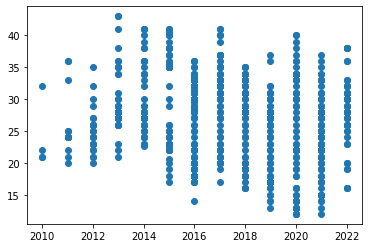

In [ ]:
# Focusing only on CDU party

plt.scatter(x=federal_elections_germany_survey_df_mod1["year"]
            , y=federal_elections_germany_survey_df_mod1["CDU"])
plt.show()